# Julia Shaw 17.3 ([Bio](https://games.crossfit.com/athlete/540933))

<table style="float: left;border-style:hidden">
<tr style="border-style:hidden">
<td>
Age: 26 ans
</td>
</tr>
<tr style="border-style:hidden"><td>
Poids: -
</td></tr>
<tr style="border-style:hidden"><td>
Taille:  Géante
</td></tr>
</table>


<img style="float: right;" src="pic.jpeg" width="185px">

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import datetime
import time
import math

In [3]:
# Read and convert checkpoints
checkpoints = [l.split('-')[1].strip() for l in open('split_times.txt').readlines()[1:-1]][::-1]
checkpoints = np.array([datetime.datetime.strptime(cp, "%H:%M:%S.%f") for cp in checkpoints])

# Convert checkpoints to split times
splits = (checkpoints - np.roll(checkpoints, 1))[1:]
splits = [split.total_seconds() for split in splits]

In [4]:
def mouvement_label(sexe='M', level='Rx', with_round=False):
    if sexe == "M":
        if level == "Rx":
            weights = [95, 135, 185, 225, 245, 265]
        else:
            # Change this for real weights
            weights = [95, 135, 185, 225, 245, 265]
    else:
        if level == "Rx":
            weights = [65, 95, 135, 155, 175, 185]
        else:
            # Change this for real weights
            weights = [65, 95, 135, 155, 175, 185]
            
    # Generate labels as needed
    base_ctb = 6
    base_snatch = 6
    for i in range(6):
        for j in range(3):
            for k in range(base_ctb + i):
                if with_round:
                    yield "CTB {}".format(j+i*3+1)
                else:
                    yield "CTB"
            for k in range(base_snatch - i):
                if with_round:
                    yield "snatch {}-{}".format(weights[i], j+1)
                else:
                    yield "snatch"
                    
def block_label(sexe='M', level='Rx', sub_block=False):
    # Generate labels as needed
    base_ctb = 6
    base_snatch = 6
    for i in range(6):
        for j in range(3):
            for k in range(base_ctb + i):
                if sub_block:
                    yield j+i*3+1
                else:
                    yield i+1
            for k in range(base_snatch - i):
                if sub_block:
                    yield j+i*3+1
                else:
                    yield i+1

In [5]:
mvmt_gen = mouvement_label(sexe='F')
round_gen = mouvement_label(sexe='F', with_round=True)
block_gen = block_label(sexe='F')
sub_block_gen = block_label(sexe='F', sub_block=True)
mvmt = [next(mvmt_gen) for i in range(len(splits))]
rounds = [next(round_gen) for i in range(len(splits))]
block = [next(block_gen) for i in range(len(splits))]
sub_block = [next(sub_block_gen) for i in range(len(splits))]

In [6]:
df = DataFrame(
    {
        "rep": range(1,len(splits)+1),
        "Movement": mvmt,
        "split": splits,
        "round": rounds,
        "block": block,
        "sub_block": sub_block
    }
)

## Split time per rep

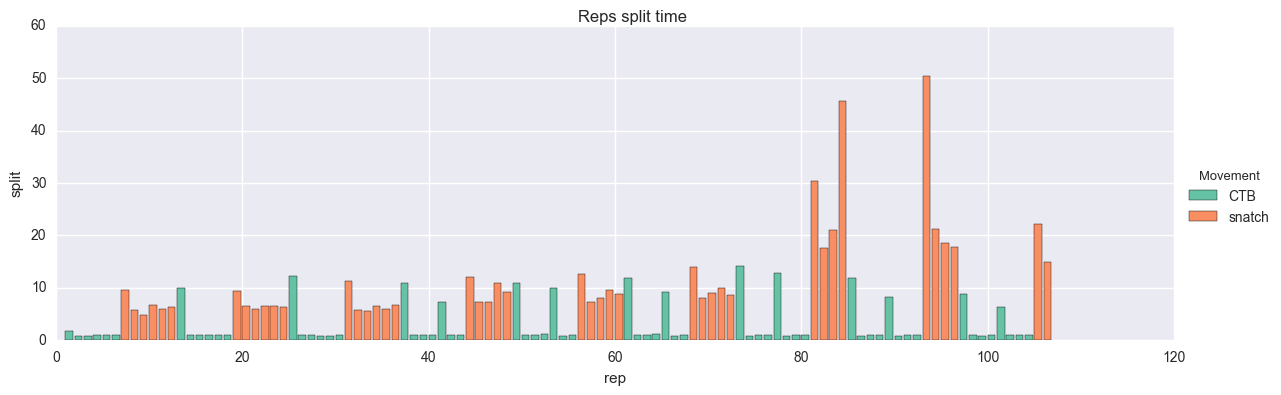

In [8]:
g = sns.FacetGrid(df, size=4, aspect=3, hue='Movement', palette='Set2')
g.map(plt.bar, 'rep', 'split').add_legend()
_ = g.fig.suptitle("Reps split time")

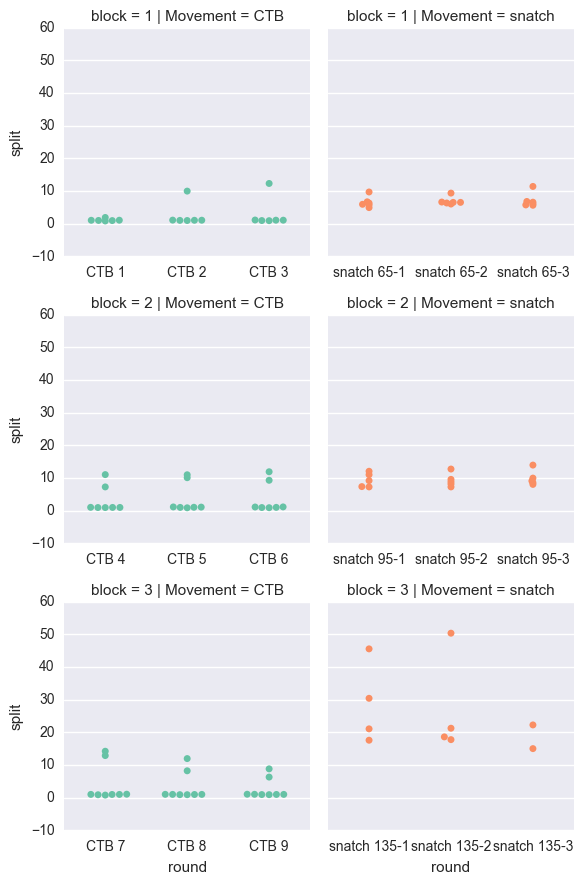

In [10]:
g = sns.FacetGrid(data=df, row='block', col='Movement', sharex=False, hue='Movement', palette='Set2')
g.map(sns.swarmplot, 'round', 'split')

## Time per mouvements

### Total time

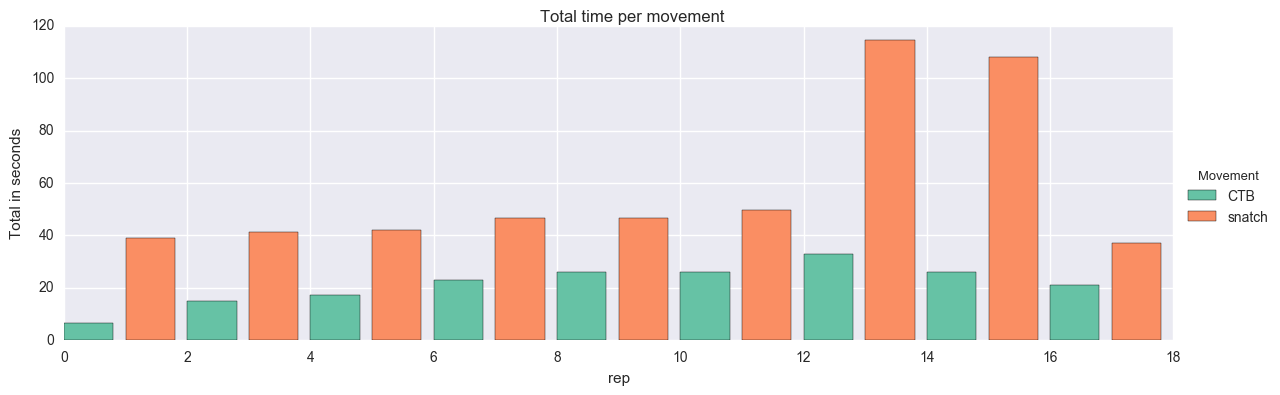

In [11]:
g = df.groupby(['round', 'sub_block'])
_df = g.aggregate({"split": sum, "rep": min, 'Movement': min})
_df = _df.sort_values('rep').reset_index()
_df['rep'] = range(_df.shape[0])

g = sns.FacetGrid(_df, size=4, aspect=3, hue='Movement', palette='Set2')
g.map(plt.bar, 'rep', 'split').add_legend()
# g.set_xticklabels(label=_df['Movement'],  rotation=90)
g.set_ylabels("Total in seconds")
_ = g.fig.suptitle("Total time per movement")


### Mean time per movement

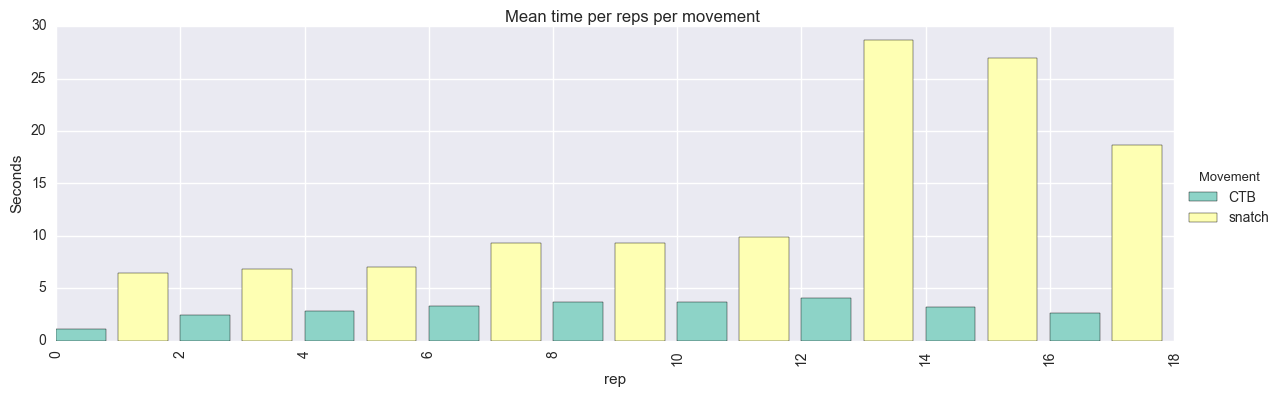

In [12]:
g = df.groupby('round')
_df = g.aggregate({"split": np.mean, "rep": min, 'Movement': min})
_df = _df.sort_values('rep').reset_index()
_df['rep'] = range(_df.shape[0])

g = sns.FacetGrid(_df, size=4, aspect=3, hue='Movement', palette='Set3')
g.map(plt.bar, 'rep', 'split').add_legend()
g.set_xticklabels(label=_df['Movement'],  rotation=90)
g.set_ylabels("Seconds")
_ = g.fig.suptitle("Mean time per reps per movement")